In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/gobind/Documents/CS/Python/Kaggle/Titanic/train.csv')
test = pd.read_csv('/Users/gobind/Documents/CS/Python/Kaggle/Titanic/test.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [6]:
mean_age = (df['Age'].sum()/df.Age.count())

In [7]:
print(mean_age)

29.69911764705882


In [8]:
df['Age'].fillna(mean_age, inplace=True)
test['Age'].fillna(mean_age, inplace=True)

In [9]:
df['Age'].sample(5)

531    29.699118
474    22.000000
539    22.000000
288    42.000000
702    18.000000
Name: Age, dtype: float64

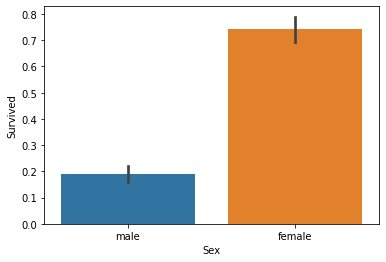

In [10]:
# survival rates by sex
sns.barplot(x="Sex", y="Survived", data=df)

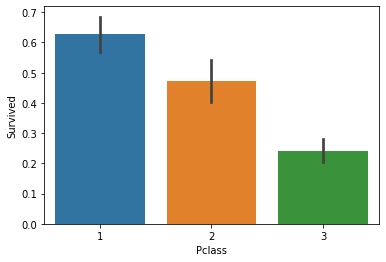

In [11]:
# indicative of socio-economic class survival rates 
sns.barplot(x="Pclass", y="Survived", data=df)

In [12]:
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296


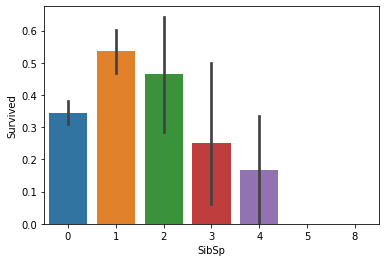

In [13]:
# siblinb spouse correlation
sns.barplot(x="SibSp", y="Survived", data=df)

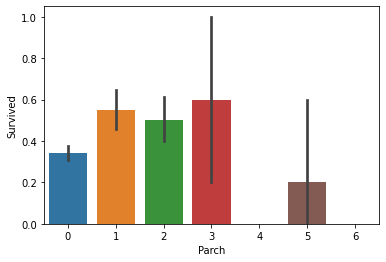

In [14]:
# relationship between number of parents and children on board and survivial
sns.barplot(x="Parch", y="Survived", data=df)

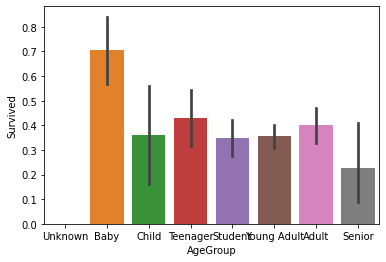

In [15]:
# create age bins for us to understand relationships between age groups and survival
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# cut the data into bins and assign bin label to each passenger
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=df)

In [16]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,7
top,NaN,NaN,NaN,"Sage, Mr. Douglas Bullen",male,NaN,NaN,NaN,NaN,S,Young Adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644,397
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN


In [17]:
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [18]:
df = df.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

In [19]:
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [20]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [21]:
#drop the name feature since it contains no more useful information.
df = df.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [22]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(df["Fare"])):
    if pd.isnull(df["Fare"][x]):
        pclass = df["Pclass"][x] #Pclass = 3
        df["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

#map Fare values into groups of numerical values
df['FareBand'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])
test = test.fillna({"FareBand": 3})

In [23]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [24]:
df = df.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [25]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
FareBand       0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

predictors = df.drop(['Survived', 'PassengerId'], axis=1)
target = df["Survived"]

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [27]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

85.28


In [28]:
ids = test['PassengerId']
test.drop('PassengerId', axis=1, inplace=True)
predictions = gbk.predict(test)

In [29]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)